In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import uncertainties as unc
from scipy import stats
from scipy.stats import norm 
from scipy.stats import uniform
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import cauchy
import scipy.constants as const
from tabulate import tabulate
import math
from matplotlib import cm
import matplotlib.cm as cm
import seaborn as sns
from scipy.optimize import minimize
from iminuit import Minuit
import pickle
import numpy as np
%matplotlib inline

# Task 1

In [27]:
# open the file of interest, and use pickle loading
infile = open("./higgs_100000_pt_250_500.pkl",'rb') # Signal
signal = pickle.load(infile)

infile2 = open("./qcd_100000_pt_250_500.pkl",'rb')
background = pickle.load(infile2)

infile3 = open ("./higgs_100000_pt_1000_1200.pkl",'rb') 

infile4 = open("./qcd_100000_pt_1000_1200.pkl",'rb')

# list all keys of the files
print(signal.keys())
print(background.keys())

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')
Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


# Task 2 Exploration
We will further explore the LHC data. You will study the correlation between the mass and jet
substructure variable d2. The goal will be to see if we can build a simple cut based analysis to
increase the discovery of signal over the background. For this task, we will use the low 𝑝𝑇 files
(Sample_pt_250_500).

    a) Make two plots of Mass and d2 each with Signal and Background distributions. Describe the shape of the two distribution, commenting on the discrimination power of signal and back-ground. Also make a 2D scatter plot between Mass and d2 for both signal and background.

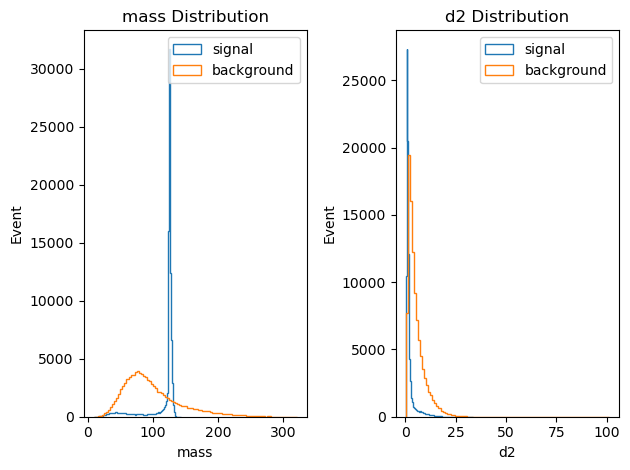

In [21]:
#  Two distributions of Mass and d2
fig, ax = plt.subplots(1,2)

ax[0].hist(signal['mass'], bins =100, histtype='step', label='signal')
ax[0].hist(background['mass'], bins =100, histtype='step', label='background')
ax[0].set_title('mass Distribution')
ax[0].set_xlabel('mass')
ax[0].set_ylabel('Event')
ax[0].legend()

# Histogram of d2
ax[1].hist(signal['d2'], bins =100, histtype='step', label='signal')
ax[1].hist(background['d2'], bins =100, histtype='step', label='background')
ax[1].set_title('d2 Distribution')
ax[1].set_xlabel('d2')
ax[1].set_ylabel('Event')
ax[1].legend()

plt.tight_layout()

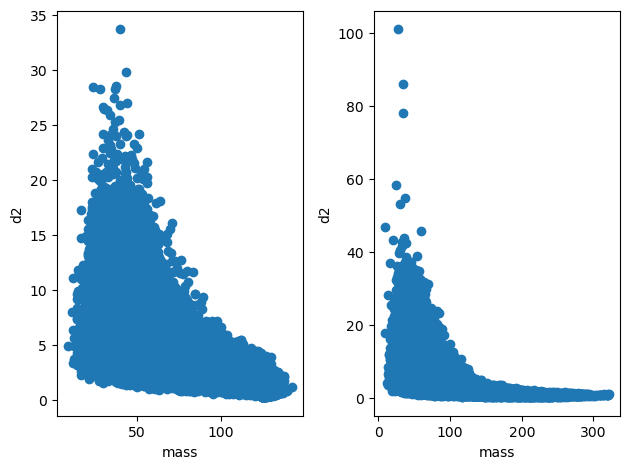

In [32]:
#  Two scatterplots of Mass and d2
fig, ax = plt.subplots(1,2)
ax[0].scatter(signal['mass'], signal['d2'])
ax[0].set_xlabel('mass')
ax[0].set_ylabel('d2')


ax[1].scatter(background['mass'], background['d2'])
ax[1].set_xlabel('mass')
ax[1].set_ylabel('d2')



plt.tight_layout()

    b) Now assume a signal yield of 100 and a background yield of 20,000, re-weight the signal and background distribution such that they satisfy this yield. Then draw two histograms with the signal stacked on the background. Describe the visibility of observing the signal over the background.

the shape of weight array is (100000, 2)
[[0.2   0.001]
 [0.2   0.001]
 [0.2   0.001]
 ...
 [0.2   0.001]
 [0.2   0.001]
 [0.2   0.001]]


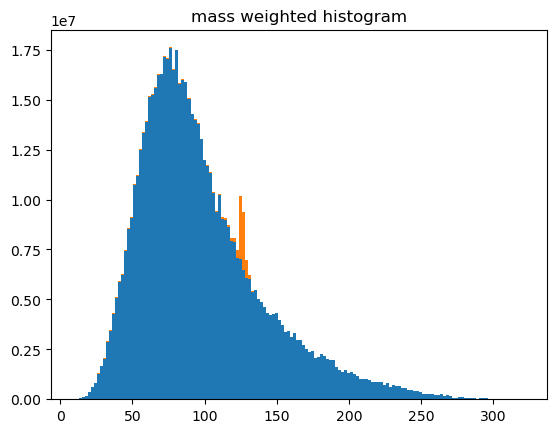

weighted: For background mass, the yield is 666666666.6669064, the area is 1388563429.8207796
weighted: For signal mass, the yield is 676666666.6669064, the area is 1409391881.2680836


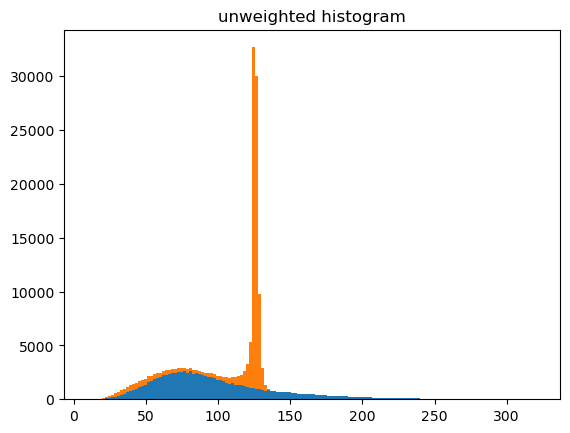

unweighted: for background mass the yield is 100000.0, the area is 208284.51447304204
unweighted: for signal mass the yield is 200000.0, the area is 416569.0289460841


In [23]:
signal_weight = 0.001 * np.ones(signal['mass'].shape[0])
background_weight = 0.200 * np.ones(background['mass'].shape[0])
weight_array = np.column_stack((background_weight, signal_weight)) 
print(f"the shape of weight array is {weight_array.shape}") # 100,000 x2
print(weight_array)

weighted_values_inbin, weighted_bins, _ = plt.hist([background['mass'], signal['mass']], bins=150, density=False, histtype='bar', 
                                                   stacked=True, weights= [(20000.0/3) * np.ones(background['mass'].shape[0]), 100.0 * np.ones(signal['mass'].shape[0])])
plt.title('mass weighted histogram')
plt.show()

print(f"weighted: For background mass, the yield is {np.sum(weighted_values_inbin[0,:])}, the area is {np.sum(weighted_values_inbin[0,:]) * (weighted_bins[1] - weighted_bins[0]) }")
print(f"weighted: For signal mass, the yield is {np.sum(weighted_values_inbin[1,:])}, the area is {np.sum(weighted_values_inbin[1,:]) * (weighted_bins[1] - weighted_bins[0]) }")


unweighted_values_inbin, unweighted_bins, _ = plt.hist([background['mass'], signal['mass']], bins=150, density=False, histtype='bar', stacked=True)
plt.title('unweighted histogram')
plt.show()

print(f"unweighted: for background mass the yield is {np.sum(unweighted_values_inbin[0,:])}, the area is {np.sum(unweighted_values_inbin[0,:]) * (unweighted_bins[1] - unweighted_bins[0]) }")
print(f"unweighted: for signal mass the yield is {np.sum(unweighted_values_inbin[1,:])}, the area is {np.sum(unweighted_values_inbin[1,:]) * (unweighted_bins[1] - unweighted_bins[0]) }")



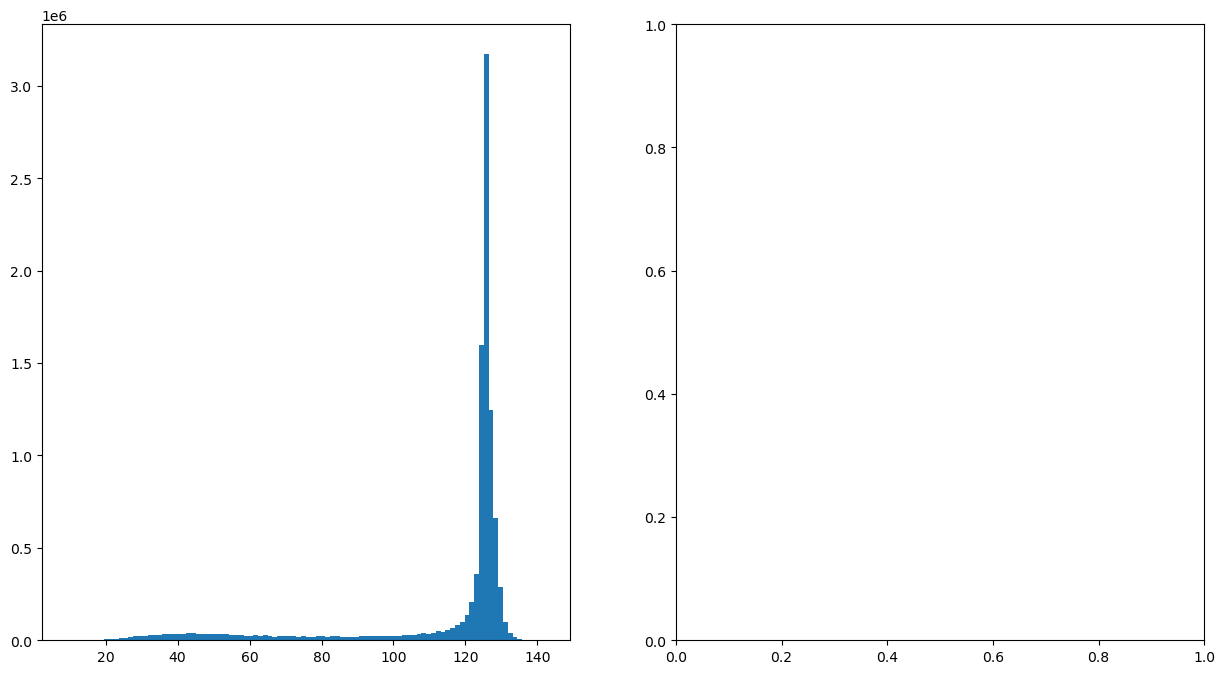

weighted: For background mass, the yield is 20000.0, the area is 62421.03517340776
weighted: For signal mass, the yield is 100.0, the area is 312.10517586703884


In [24]:

fig, ax = plt.subplots(1, 2, figsize=(15,8))
w_m_s, weighted_bins, _ = ax[0].hist(signal['mass'], bins=100, label='signal', density=False, histtype='bar', stacked=True, weights= 100 * np.ones(signal['mass'].shape[0]))
plt.show()
w_m_b, weighted_bins, _ = ax[1].hist(background['mass'], bins=100, label='background', density=False, histtype='bar', stacked=True, weights= (20000/3) * np.ones(background['mass'].shape[0]))
plt.show()

ax[0].legend()

print(f"weighted: For background mass, the yield is {np.sum(w_m_b[0])}, the area is {np.sum(w_m_b[0]) * (weighted_bins[1] - weighted_bins[0]) }")
print(f"weighted: For signal mass, the yield is {np.sum(w_m_s[0])}, the area is {np.sum(w_m_s[0]) * (weighted_bins[1] - weighted_bins[0]) }")





    c) Using the weighted samples from Q2 apply a Mass cut of [120, 130] GeV. Now again make the two histograms as above. Does the Mass distribution look as you expect it? how does the d2 plot compare to the one in Task 2b

# Task 3 Significance Optimization
Now we want to scan over d2 to find a good cut on d2 to increase our significance. The siginificance
formula is given below(it’s a good exercise to think about the derivation of the formula), and it is
in the unit of 𝜎: <br>
\begin{equation}
\end{equation}
We want to reject as many bkg as possible while keep the signal to make signal more visible(siginificant).


1. Inspect the d2 distribution after you apply the mass cut, how does it change compared to that without any mass cut?

2. Let’s say you choose a d2 cut value of 4, do you want to keep the histogram below 4 of above 4? Which makes signal more siginificant?

3. What range can be chosen to scan the d2 cut?

### After you have some ideas, choose a range to scan d2. For each d2 value you can calculate a significane. Then plot significance vs. d2 cut value, choose the cut value corresponding to 3𝜎. Now plot the Mass distributions with the mass cut and with the d2 cut. What do you observe in this plot? What is the significance value with these two cuts(mass and t2)? A good checking is that compare the significance before any d2 cut and with a very large d2 cut.

# Bonus
Optimize discovery significance for high Pt data (Sample_pt_1000_1200) and explore combination
of at least 3 features.
